In [239]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats

In [240]:
# This notebook generates some random, lumpy gaussian-mixture data,
# finds the Bayes decision boundary between class 1 and class 2 
# and then fits neural networks of varying levels of complexity
# to differentiate between the two classes.

In [241]:
# Generate means for class 1 and class 2
means1 = scipy.stats.multivariate_normal.rvs(mean=[0,1], cov=np.array([[1, 0], [0, 1]]), size=10)
means2 = scipy.stats.multivariate_normal.rvs(mean=[1,0], cov=np.array([[1, 0], [0, 1]]), size=10)

In [242]:
n_clusters = 10
finestd = 0.2
clusters_1 = (np.random.randn(n_clusters, 2) + np.ones((n_clusters,2)) * [0,1])  
clusters_2 = (np.random.randn(n_clusters, 2) + np.ones((n_clusters,2)) * [1,0])


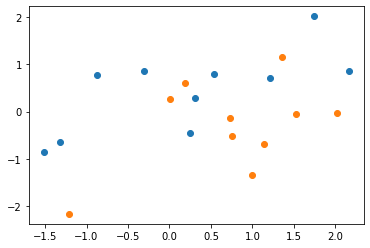

In [243]:
plt.plot(clusters_1[:,0], clusters_1[:,1], 'o')
plt.plot(clusters_2[:,0], clusters_2[:,1], 'o')

In [244]:
def generate_samples(n): 
    index1 = np.random.randint(n_clusters, size=n).astype(int)
    index2 = np.random.randint(n_clusters, size=n).astype(int)
    means1 = clusters_1[index1]
    means2 = clusters_2[index2]
    samples1=np.random.randn (n,2) * finestd + means1
    samples2=np.random.randn (n,2) * finestd + means2
    return(samples1, samples2)

In [266]:
test1, test2 = generate_samples(1000)
train1, train2 = generate_samples(100)

Xtest = np.vstack([test1, test2])
Ytest = np.vstack([np.ones((test1.shape[0],1))*1, np.ones((test2.shape[0],1))*2])


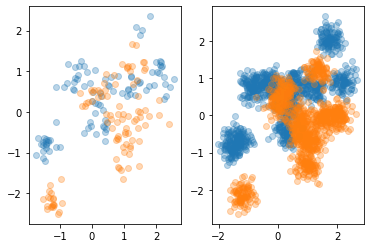

In [267]:
plt.subplot(121)
plt.plot(train1[:,0], train1[:,1], 'o', alpha=0.3)
plt.plot(train2[:,0], train2[:,1], 'o', alpha=0.3)
plt.subplot(122)
plt.plot(test1[:,0], test1[:,1], 'o', alpha=0.3)
plt.plot(test2[:,0], test2[:,1], 'o', alpha=0.3)

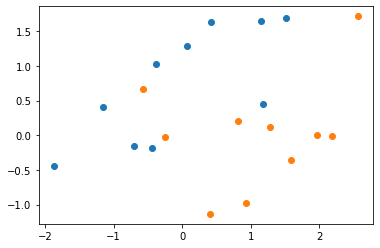

In [268]:
plt.plot(means1[:,0], means1[:,1],'o')
plt.plot(means2[:,0], means2[:,1],'o')


In [269]:
def prob_class1(x):
    print( (scipy.stats.norm.pdf(x, loc =clusters_1, scale=finestd) ) )
    print( (scipy.stats.norm.pdf(x, loc =clusters_1, scale=finestd ) ) )

    c1 = np.sum( scipy.stats.norm.pdf(x, loc =clusters_1, scale=finestd ) ) 
    c2 = np.sum( scipy.stats.norm.pdf(x, loc =clusters_2, scale=finestd) ) 
    return(c1)
    return(c1/(c1+c2))
prob_class1([0,0])

[[8.14508031e-13 1.92304842e-04]
 [7.34600767e-17 1.53989606e-22]
 [6.75329376e-10 1.07525027e-02]
 [5.06419574e-02 6.51754380e-04]
 [6.14295487e-01 1.58856576e-04]
 [1.03219968e-25 1.75427594e-04]
 [1.86127396e-08 3.82046668e-03]
 [6.03393184e-01 6.75986939e-01]
 [1.54667921e-04 1.20845564e-03]
 [9.23526007e-01 1.70836418e-01]]
[[8.14508031e-13 1.92304842e-04]
 [7.34600767e-17 1.53989606e-22]
 [6.75329376e-10 1.07525027e-02]
 [5.06419574e-02 6.51754380e-04]
 [6.14295487e-01 1.58856576e-04]
 [1.03219968e-25 1.75427594e-04]
 [1.86127396e-08 3.82046668e-03]
 [6.03393184e-01 6.75986939e-01]
 [1.54667921e-04 1.20845564e-03]
 [9.23526007e-01 1.70836418e-01]]


3.0557944476089354

In [250]:
print(clusters_1.shape, clusters_2.shape)

(10, 2) (10, 2)


In [251]:
def prob_class1(x):
    c1 =0
    c2 = 0
    for i in range(clusters_1.shape[0]):
        c1 = c1 + scipy.stats.multivariate_normal.pdf(x, mean =clusters_1[i,:], cov=np.eye(clusters_1.shape[1]) * finestd )  
    for i in range(clusters_2.shape[0]):
        c2 = c2 + scipy.stats.multivariate_normal.pdf(x, mean =clusters_2[i,:], cov=np.eye(clusters_2.shape[1]) * finestd )  
    #return(c1)
    return(c1/(c1+c2))
prob_class1([0,0])

0.4686589685179422

In [252]:
xgrid = np.linspace(-4,4,110) # range for x1
ygrid = np.linspace(-4,4,100)  # range for x2

xax, yax = np.meshgrid(xgrid, ygrid, indexing="ij")
z = np.zeros(xax.shape)
print(xax.shape, yax.shape, z.shape)
for i in range(len(xgrid)):
    for j in range(len(ygrid)):
        x = np.array([xgrid[i], ygrid[j]])
       # print(x)
        z[i,j]= prob_class1(x)

(110, 100) (110, 100) (110, 100)


<ipython-input-253-ca72afc23c6e>:5: MatplotlibDeprecationWarning: The 'cmap' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  plt.colorbar(cmap="seismic")


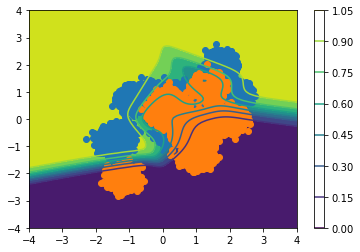

In [253]:
CS = plt.contourf(xax, yax, z) # , levels=[0, 0.25, 0.5, 0.75, 1.0], cmap="seismic")
plt.scatter(test1[:,0], test1[:,1])
plt.scatter(test2[:,0], test2[:,1])
CS = plt.contour(xax, yax, z) 
plt.colorbar(cmap="seismic")


<ipython-input-254-aa684e51f90b>:4: UserWarning: The following kwargs were not used by contour: 'color', 'width'
  CS = plt.contour(xax, yax, z, levels= [ 0.5], color="black", width=2)


Text(0.5, 1.0, 'Decision boundary when density is known')

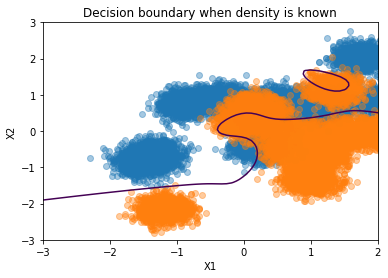

In [254]:
plt.scatter(test1[:,0], test1[:,1], alpha=0.4)
plt.scatter(test2[:,0], test2[:,1], alpha=0.4)
#CS = plt.contour(xax, yax, z, ) 
CS = plt.contour(xax, yax, z, levels= [ 0.5], color="black", width=2) 
plt.xlim(-3,2 )
plt.ylim(-3,3)
plt.xlabel("X1"); plt.ylabel("X2")
plt.title("Decision boundary when density is known")

In [ ]:
Xtest.shape

In [271]:
prob_test = np.array([ prob_class1(x) for x in Xtest] )

[[5.89757079e-05 2.67406454e-13]
 [4.43322856e-30 3.75729228e-10]
 [2.87072625e-03 5.64665564e-10]
 [1.78865885e-07 1.65848263e+00]
 [6.95580937e-01 1.27550039e+00]
 [1.20707908e-41 1.30308084e+00]
 [2.79481671e-18 1.97559063e+00]
 [6.89322792e-05 3.11044081e-01]
 [7.86330450e-01 1.80229028e+00]
 [2.62634498e-04 2.82649555e-07]]
[[5.89757079e-05 2.67406454e-13]
 [4.43322856e-30 3.75729228e-10]
 [2.87072625e-03 5.64665564e-10]
 [1.78865885e-07 1.65848263e+00]
 [6.95580937e-01 1.27550039e+00]
 [1.20707908e-41 1.30308084e+00]
 [2.79481671e-18 1.97559063e+00]
 [6.89322792e-05 3.11044081e-01]
 [7.86330450e-01 1.80229028e+00]
 [2.62634498e-04 2.82649555e-07]]
[[6.88536721e-30 4.20308535e-13]
 [4.96038941e-05 2.52790154e-10]
 [2.78506716e-25 8.33355997e-10]
 [7.65322431e-01 1.59734068e+00]
 [2.61982587e-07 1.20423295e+00]
 [3.65357558e-10 1.23193449e+00]
 [2.77365161e-01 1.95608678e+00]
 [7.75851124e-02 3.47881886e-01]
 [6.47987370e-16 1.75200890e+00]
 [3.40051744e-02 3.92912560e-07]]
[[6.885

In [256]:
prob_test.shape

(20000,)

In [257]:
# Evaluate the number of the testing points that would have been classified
# correctly using the Bayes pick-the-most-likely-category rule.

bayes_error_est = np.sum(np.equal(1 + (prob_test < 0.5), Ytest[:,0])) / len(Ytest)
bayes_error_est

0.841

In [ ]:
# This term took some fiddling to get right because my categories were 
# 1 and 2.

In [259]:
Ytest

array([[1.],
       [1.],
       [1.],
       ...,
       [2.],
       [2.],
       [2.]])

In [260]:
Ytest.shape, Xtest.shape

((2000, 1), (2000, 2))

In [261]:
# assemble the matrices into the right shapes
X   = np.vstack ( [ train1, train2])
Y   = np.vstack ( [ np.ones((train1.shape[0],1)), 
                    np.ones((train2.shape[0],1))*2 ])

In [262]:
X.shape, Y.shape

((200, 2), (200, 1))

In [264]:
from sklearn.linear_model import Perceptron
clf = Perceptron()  # defaults for everything
clf.fit(X, Y)
clf.score(Xtest, Ytest)
perceptronY = clf.predict(Xtest)
clf.score(Xtest, Ytest)

/Applications/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


0.6235

In [272]:
# confusion?  
BAYES =  np.array((prob_test < 0.5) ) + np.array(Ytest  * 10).T
unique, counts = np.unique(BAYES, return_counts=True)
unique, counts

(array([10., 20.]), array([1000, 1000]))

In [273]:
from sklearn.metrics import confusion_matrix
confusion_matrix(prob_test<0.5, Ytest)


array([[   0, 1000, 1000],
       [   0,    0,    0],
       [   0,    0,    0]])

In [274]:
confusion_matrix(perceptronY, Ytest)

array([[328,  81],
       [672, 919]])

In [275]:
perceptron_score = clf.score(Xtest, Ytest)
# Okay, perceptron is doing much worse than Bayes, and we know why.
perceptron_score

0.632

In [276]:
xgrid = np.linspace(-4,4,110) # range for x1
ygrid = np.linspace(-4,4,100)  # range for x2
xax, yax = np.meshgrid(xgrid, ygrid, indexing="ij")
def gridmap(fun):
    z = np.zeros(xax.shape)
    print(xax.shape, yax.shape, z.shape)
    for i in range(len(xgrid)):
        for j in range(len(ygrid)):
            x = np.array([xgrid[i], ygrid[j]])
           # print(x)
            z[i,j]= fun(x.reshape((1, -1)))
    return(z)
c={1:"red", 2:"blue"}
def display_grid(z):
    color = [ c[e] for e in z.reshape(-1)]
    plt.scatter(xax, yax, c=color, marker="s", alpha=0.2, s= 110/8)
    plt.plot(train1[:,0], train1[:,1], 'o', alpha=0.7)
    plt.plot(train2[:,0], train2[:,1], 'o', alpha=0.7)


In [277]:
[e for e in z.reshape(-1)][0]


4.984178658911145e-06

In [278]:
perceptron_boundary = gridmap(clf.predict)


(110, 100) (110, 100) (110, 100)


In [279]:
perceptron_boundary

array([[2., 2., 2., ..., 1., 1., 1.],
       [2., 2., 2., ..., 1., 1., 1.],
       [2., 2., 2., ..., 1., 1., 1.],
       ...,
       [2., 2., 2., ..., 1., 1., 1.],
       [2., 2., 2., ..., 1., 1., 1.],
       [2., 2., 2., ..., 1., 1., 1.]])

Text(0.5, 1.0, 'Perceptron 0.632')

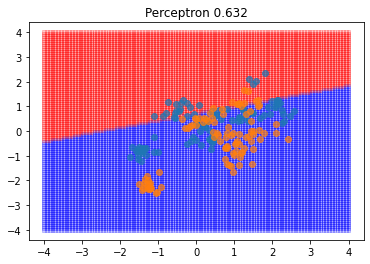

In [280]:
display_grid( perceptron_boundary)
plt.title("Perceptron {:.3f}".format(perceptron_score))


In [286]:
from sklearn.neural_network import MLPClassifier
mlp1 = MLPClassifier()
mlp1.fit(X, Y)
mlp1_score = mlp1.score(Xtest, Ytest)
mlp1_score

/Applications/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


0.7755

In [287]:
mlp1_boundary = gridmap(mlp1.predict)


(110, 100) (110, 100) (110, 100)


Text(0.5, 1.0, 'MLP, 1-layer, 0.775')

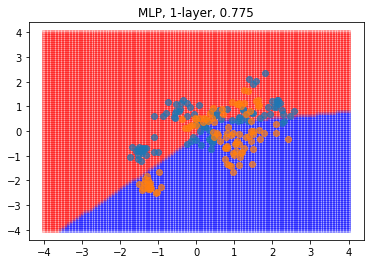

In [288]:
display_grid(mlp1_boundary)
plt.title("MLP, 1-layer, {:.3f}".format(mlp1_score))


In [295]:
# This does not converge well, and when it does
# converge, it seems to have nearly-linear boundaries.
mlp2 = MLPClassifier(hidden_layer_sizes=(4,),max_iter=1000)
mlp2.fit(X, Y)
mlp2_boundary = gridmap(mlp2.predict)

mlp2_score = mlp2.score(Xtest, Ytest)
mlp2_score


/Applications/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


(110, 100) (110, 100) (110, 100)


0.7745

In [ ]:
# Any thoughts on why this happens with n_hidden = (4) but not with n_hidden=(100)?

Text(0.5, 1.0, 'MLP, 1-layer, 4-node 0.774')

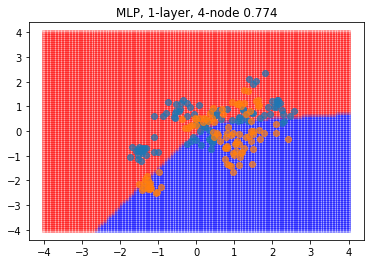

In [296]:
display_grid(mlp2_boundary)
plt.title("MLP, 1-layer, 4-node {:.3f}".format(mlp2_score))


In [297]:
mlp3 = MLPClassifier(hidden_layer_sizes=(30,30,30))
mlp3.fit(X, Y)
mlp3_boundary = gridmap(mlp3.predict)

mlp3_score = mlp3.score(Xtest, Ytest)
mlp3_score

/Applications/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


(110, 100) (110, 100) (110, 100)


0.8285

Text(0.5, 1.0, 'MLP, 3-layer 0.829')

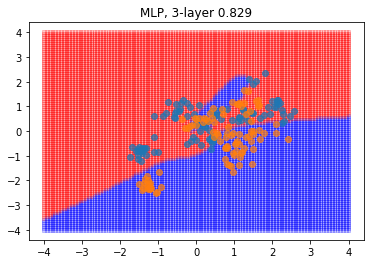

In [298]:
display_grid(mlp3_boundary)
plt.title("MLP, 3-layer {:.3f}".format(mlp3_score))


In [299]:
# This is nice, but I want to see overfitting.  More layers?
mlp4 = MLPClassifier(hidden_layer_sizes=(100,60,30,10, 5))
mlp4.fit(X, Y)
mlp4_boundary = gridmap(mlp4.predict)
mlp4_score = mlp4.score(Xtest, Ytest)
mlp4_score

/Applications/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


(110, 100) (110, 100) (110, 100)


0.8535

Text(0.5, 1.0, 'MLP, 3-layer 0.854')

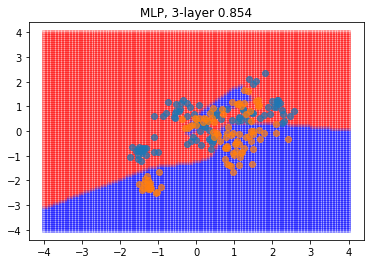

In [300]:
display_grid(mlp4_boundary)
plt.title("MLP, 3-layer {:.3f}".format(mlp4_score))

In [301]:
# This is nice, but I want to see overfitting.  Bigger layers?
mlp5 = MLPClassifier(hidden_layer_sizes=(100,100,60,60, 30))
mlp5.fit(X, Y)
mlp5_boundary = gridmap(mlp5.predict)
mlp5_score = mlp5.score(Xtest, Ytest)
mlp5_score

/Applications/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


(110, 100) (110, 100) (110, 100)


0.866

Text(0.5, 1.0, 'MLP, 5-layer 0.866')

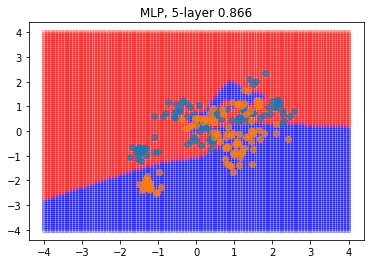

In [302]:
display_grid(mlp5_boundary)
plt.title("MLP, 5-layer {:.3f}".format(mlp5_score))

(2, 100)


(array([ 2.,  5.,  3.,  5.,  6.,  9.,  9., 13.,  7.,  6.,  6.,  4.,  7.,
         7., 12.,  6., 10., 11.,  7.,  1.,  9.,  4., 14.,  8., 10.,  5.,
         5.,  5.,  3.,  1.]),
 array([-0.3461428 , -0.3226908 , -0.2992388 , -0.2757868 , -0.2523348 ,
        -0.2288828 , -0.2054308 , -0.1819788 , -0.1585268 , -0.1350748 ,
        -0.1116228 , -0.0881708 , -0.0647188 , -0.0412668 , -0.0178148 ,
         0.0056372 ,  0.0290892 ,  0.0525412 ,  0.07599319,  0.09944519,
         0.12289719,  0.14634919,  0.16980119,  0.19325319,  0.21670519,
         0.24015719,  0.26360919,  0.28706119,  0.31051319,  0.33396519,
         0.35741719]),
 <BarContainer object of 30 artists>)

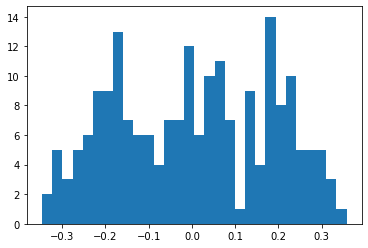

In [303]:
print(mlp5.coefs_[0].shape)
plt.hist(mlp5.coefs_[0].reshape((-1)), bins=30)

(array([1.000e+00, 2.000e+00, 8.000e+00, 1.100e+01, 2.000e+01, 2.900e+01,
        6.500e+01, 1.040e+02, 1.980e+02, 2.990e+02, 3.630e+02, 4.450e+02,
        4.710e+02, 7.050e+02, 9.010e+02, 1.173e+03, 1.261e+03, 8.180e+02,
        7.210e+02, 4.910e+02, 5.080e+02, 4.620e+02, 3.690e+02, 2.700e+02,
        1.740e+02, 6.300e+01, 3.800e+01, 1.600e+01, 1.000e+01, 4.000e+00]),
 array([-0.39793506, -0.3731332 , -0.34833134, -0.32352948, -0.29872762,
        -0.27392576, -0.2491239 , -0.22432204, -0.19952018, -0.17471831,
        -0.14991645, -0.12511459, -0.10031273, -0.07551087, -0.05070901,
        -0.02590715, -0.00110529,  0.02369657,  0.04849843,  0.07330029,
         0.09810215,  0.12290402,  0.14770588,  0.17250774,  0.1973096 ,
         0.22211146,  0.24691332,  0.27171518,  0.29651704,  0.3213189 ,
         0.34612076]),
 <BarContainer object of 30 artists>)

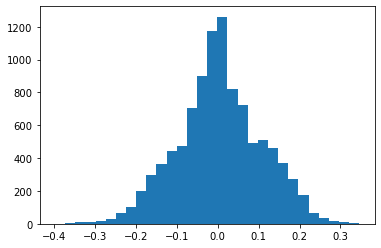

In [304]:
plt.hist(mlp5.coefs_[1].reshape((-1)), bins=30)

(array([  2.,   0.,   7.,   9.,  24.,  38.,  51., 105., 115., 151., 204.,
        207., 212., 414., 455., 550., 892., 478., 438., 356., 241., 218.,
        211., 168., 152., 133.,  89.,  43.,  31.,   6.]),
 array([-0.38822938, -0.36443579, -0.3406422 , -0.31684861, -0.29305502,
        -0.26926143, -0.24546784, -0.22167425, -0.19788066, -0.17408707,
        -0.15029348, -0.12649989, -0.1027063 , -0.07891272, -0.05511913,
        -0.03132554, -0.00753195,  0.01626164,  0.04005523,  0.06384882,
         0.08764241,  0.111436  ,  0.13522959,  0.15902318,  0.18281677,
         0.20661035,  0.23040394,  0.25419753,  0.27799112,  0.30178471,
         0.3255783 ]),
 <BarContainer object of 30 artists>)

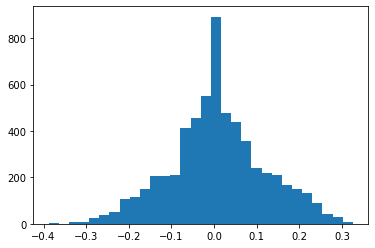

In [305]:
plt.hist(mlp5.coefs_[2].reshape((-1)), bins=30)

(array([  5.,   6.,  19.,  19.,  43.,  54.,  72., 108., 127., 135., 137.,
        248., 217., 217., 411., 310., 252., 221., 225., 135., 137., 128.,
         93.,  85.,  63.,  73.,  34.,  14.,   8.,   4.]),
 array([-0.37313028, -0.34819313, -0.32325598, -0.29831883, -0.27338169,
        -0.24844454, -0.22350739, -0.19857024, -0.17363309, -0.14869595,
        -0.1237588 , -0.09882165, -0.0738845 , -0.04894735, -0.02401021,
         0.00092694,  0.02586409,  0.05080124,  0.07573839,  0.10067553,
         0.12561268,  0.15054983,  0.17548698,  0.20042412,  0.22536127,
         0.25029842,  0.27523557,  0.30017272,  0.32510986,  0.35004701,
         0.37498416]),
 <BarContainer object of 30 artists>)

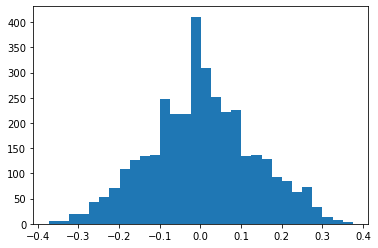

In [306]:
plt.hist(mlp5.coefs_[3].reshape((-1)), bins=30)

(array([  3.,   5.,  17.,  10.,  19.,  31.,  57.,  45.,  62.,  60.,  91.,
        119., 115.,  97., 178., 174., 104.,  98., 105., 103.,  63.,  65.,
         44.,  39.,  27.,  28.,  17.,  15.,   6.,   3.]),
 array([-4.19202287e-01, -3.91263260e-01, -3.63324232e-01, -3.35385205e-01,
        -3.07446178e-01, -2.79507151e-01, -2.51568124e-01, -2.23629097e-01,
        -1.95690069e-01, -1.67751042e-01, -1.39812015e-01, -1.11872988e-01,
        -8.39339606e-02, -5.59949334e-02, -2.80559063e-02, -1.16879072e-04,
         2.78221481e-02,  5.57611753e-02,  8.37002025e-02,  1.11639230e-01,
         1.39578257e-01,  1.67517284e-01,  1.95456311e-01,  2.23395338e-01,
         2.51334366e-01,  2.79273393e-01,  3.07212420e-01,  3.35151447e-01,
         3.63090474e-01,  3.91029501e-01,  4.18968529e-01]),
 <BarContainer object of 30 artists>)

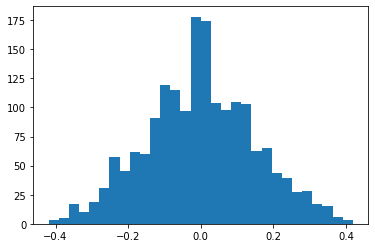

In [307]:
plt.hist(mlp5.coefs_[4].reshape((-1)), bins=30)